In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset/data')


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kaamdhari59
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset


100%|██████████| 149M/149M [00:00<00:00, 1.21GB/s]

In [4]:
import os
import random
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from IPython.display import Image
import imutils
import warnings
warnings.filterwarnings('ignore')

In [5]:
os.mkdir('/content/Crop_Brain_MRI/')
os.mkdir('/content/Crop_Brain_MRI/glioma')
os.mkdir('/content/Crop_Brain_MRI/meningioma')
os.mkdir('/content/Crop_Brain_MRI/notumor')
os.mkdir('/content/Crop_Brain_MRI/pituitary')

In [6]:
os.mkdir('/content/Test_Data/')
os.mkdir('/content/Test_Data/glioma')
os.mkdir('/content/Test_Data/meningioma')
os.mkdir('/content/Test_Data/notumor')
os.mkdir('/content/Test_Data/pituitary')

In [7]:
# data visualization

In [8]:
trainDir= '/content/brain-tumor-mri-dataset/Training/'
testDIr='/content/brain-tumor-mri-dataset/Testing/'

In [9]:
classes = os.listdir('/content/brain-tumor-mri-dataset/Training/')

In [10]:
classes

['glioma', 'notumor', 'meningioma', 'pituitary']

In [11]:
filepathDict = {}

for c in classes:
  filepathDict[c] = list(map(lambda x: trainDir + c + '/' + x,os.listdir(trainDir+c)))


In [12]:
filepathDict

{'glioma': ['/content/brain-tumor-mri-dataset/Training/glioma/Tr-gl_0251.jpg',
  '/content/brain-tumor-mri-dataset/Training/glioma/Tr-gl_1270.jpg',
  '/content/brain-tumor-mri-dataset/Training/glioma/Tr-gl_0828.jpg',
  '/content/brain-tumor-mri-dataset/Training/glioma/Tr-gl_0222.jpg',
  '/content/brain-tumor-mri-dataset/Training/glioma/Tr-gl_0574.jpg',
  '/content/brain-tumor-mri-dataset/Training/glioma/Tr-gl_0704.jpg',
  '/content/brain-tumor-mri-dataset/Training/glioma/Tr-gl_1231.jpg',
  '/content/brain-tumor-mri-dataset/Training/glioma/Tr-gl_0705.jpg',
  '/content/brain-tumor-mri-dataset/Training/glioma/Tr-gl_0234.jpg',
  '/content/brain-tumor-mri-dataset/Training/glioma/Tr-gl_0497.jpg',
  '/content/brain-tumor-mri-dataset/Training/glioma/Tr-gl_1167.jpg',
  '/content/brain-tumor-mri-dataset/Training/glioma/Tr-gl_0771.jpg',
  '/content/brain-tumor-mri-dataset/Training/glioma/Tr-glTr_0001.jpg',
  '/content/brain-tumor-mri-dataset/Training/glioma/Tr-gl_0719.jpg',
  '/content/brain-tumo

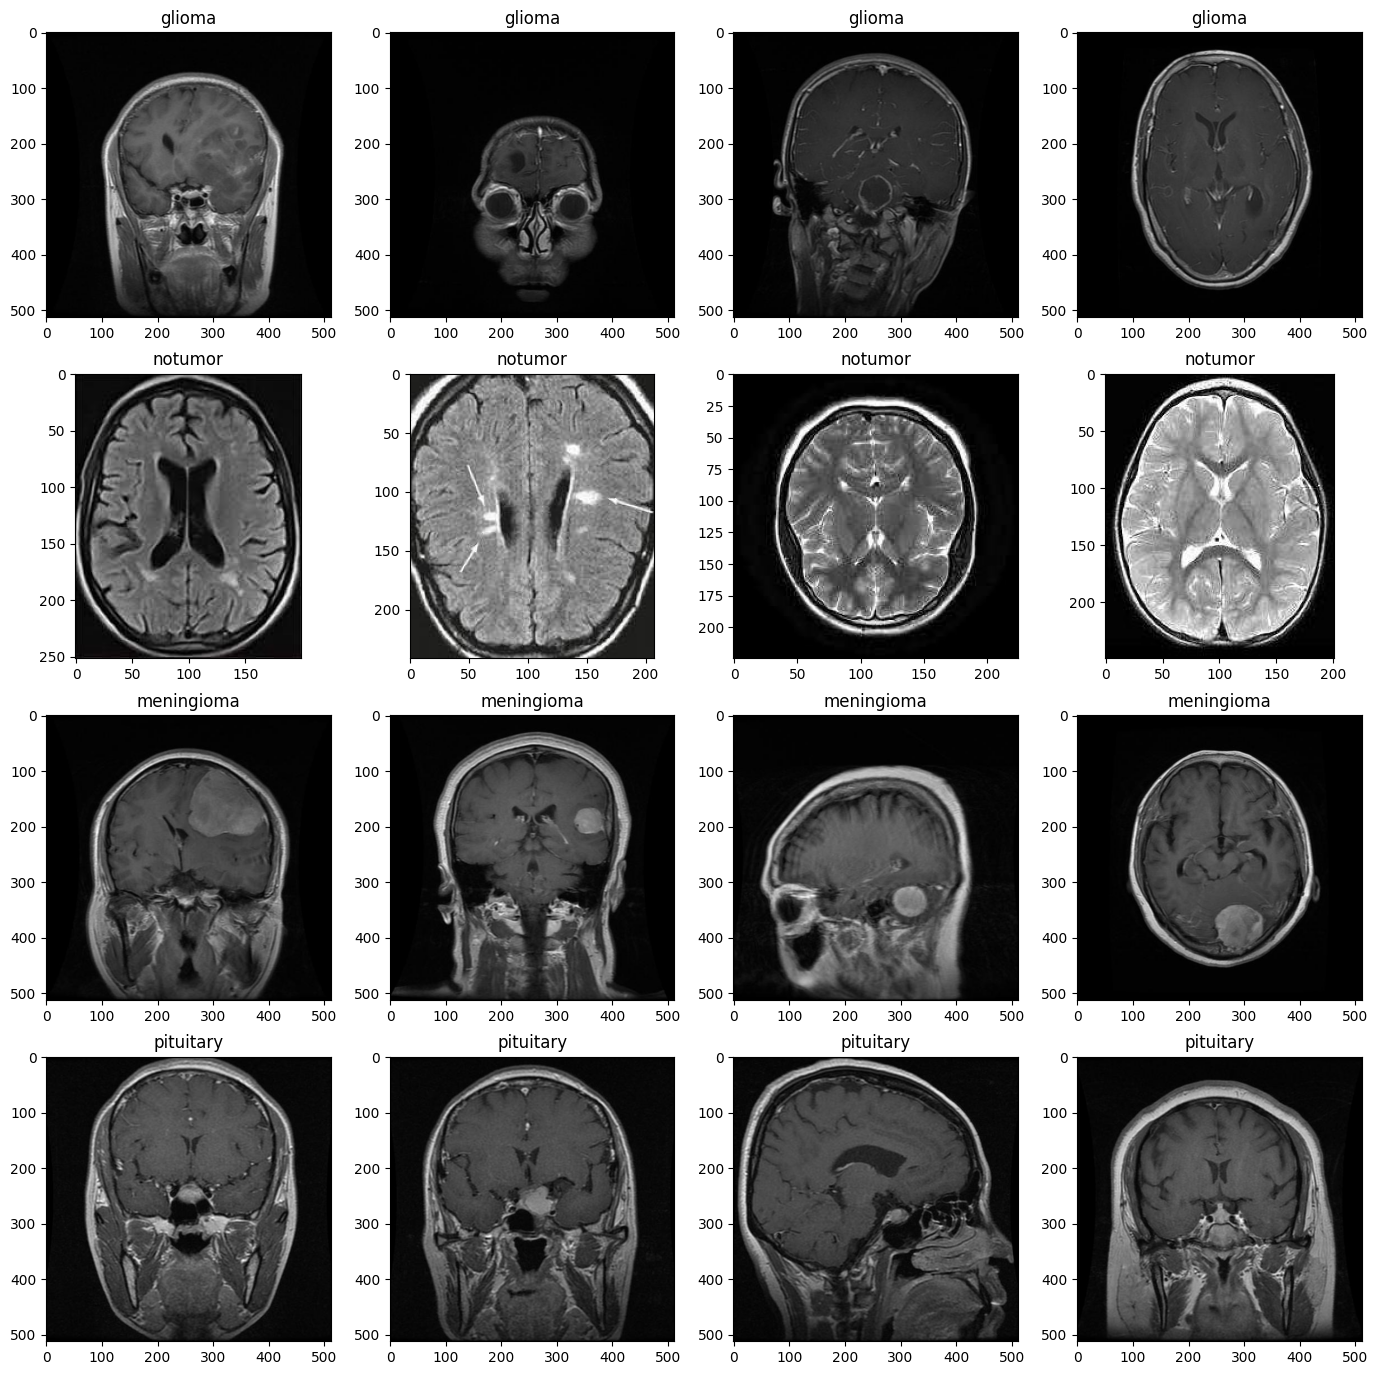

In [13]:
from tensorflow.keras.preprocessing.image import load_img

plt.figure(figsize=(17,17))

index=0
for c in classes:
  random.shuffle(filepathDict[c])
  pathList = filepathDict[c][:5]
  for i in range(1,5):
    index+=1
    plt.subplot(4,4,index)
    plt.imshow(load_img(pathList[i]))
    plt.title(c)


In [14]:
NoImagesPerClass = []
className=[]
for i in os.listdir('/content/brain-tumor-mri-dataset/Training'):
  trainClass=os.listdir(os.path.join('/content/brain-tumor-mri-dataset/Training',i))
  NoImagesPerClass.append(len(trainClass))
  className.append(i)
  print(f"Number of images in {i} : {len(trainClass)}")

Number of images in glioma : 1321
Number of images in notumor : 1595
Number of images in meningioma : 1339
Number of images in pituitary : 1457


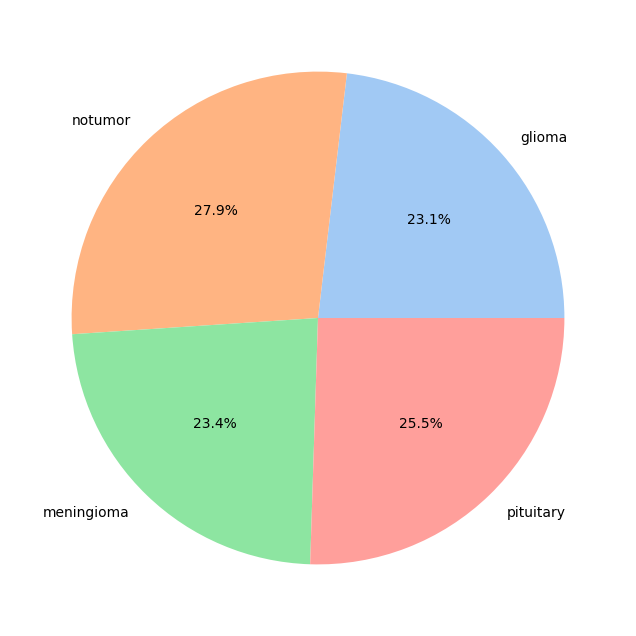

In [15]:
plt.figure(figsize=(8,8))
colors=sns.color_palette('pastel')
plt.pie(NoImagesPerClass,labels=className,autopct = '%1.1f%%',colors=colors)
plt.show()

In [16]:
def cropImages(image,plot=False):
  imgGray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  imgGray=cv2.GaussianBlur(imgGray,(5,5),0)
  imgThresh=cv2.threshold(imgGray,45,255,cv2.THRESH_BINARY)[1]
  cv2.erode(imgThresh,None,iterations=2)
  imgThresh=cv2.dilate(imgThresh,None,iterations=2)

  contours = cv2.findContours(imgThresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

  contours = imutils.grab_contours(contours)
  c = max(contours,key=cv2.contourArea)

  extLeft = tuple(c[c[:,:,0].argmin()][0])
  extRight = tuple(c[c[:,:,0].argmax()][0])
  extTop = tuple(c[c[:,:,1].argmin()][0])
  extBot = tuple(c[c[:,:,1].argmax()][0])

  newImg = image[extTop[1]:extBot[1],extLeft[0]:extRight[0]]
  if plot:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.subplot(1,2,2)
    plt.imshow(newImg)
    plt.title('Cropped Image')
    plt.show()
  return newImg


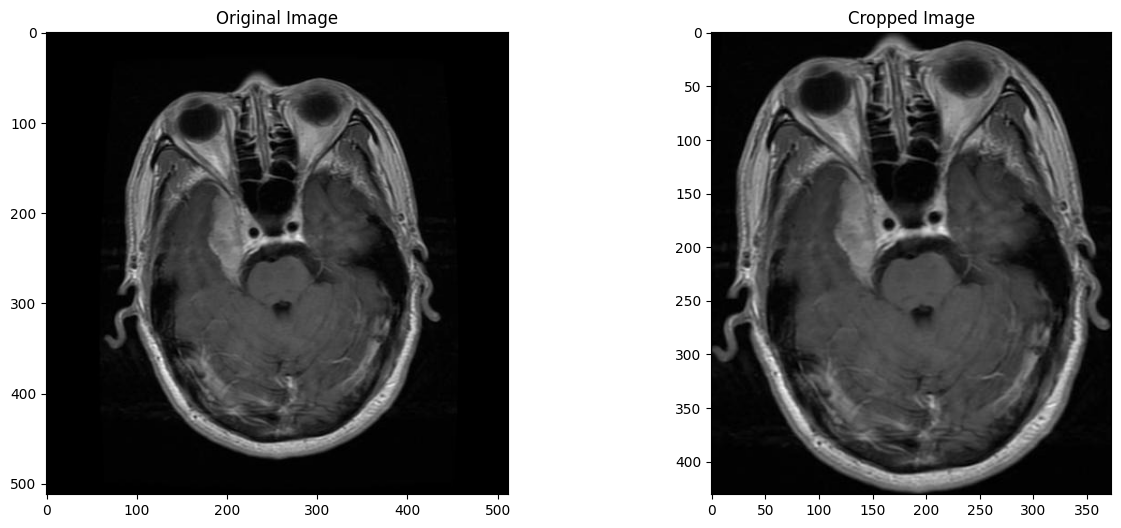

In [17]:
exampleImage = cv2.imread('/content/brain-tumor-mri-dataset/Training/meningioma/Tr-meTr_0003.jpg')
cropped = cropImages(exampleImage,plot=True)

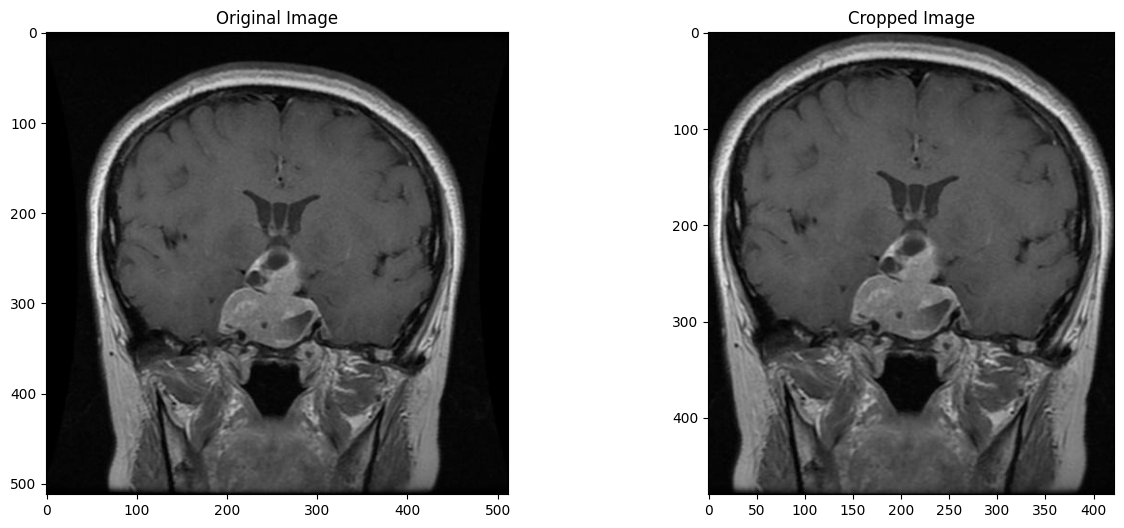

In [18]:
exampleImage = cv2.imread('/content/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0015.jpg')
cropped = cropImages(exampleImage,plot=True)

In [19]:
# saving the croppped images


In [20]:
glioma=trainDir+'glioma'
meningioma=trainDir+'meningioma'
notumor=trainDir+'notumor'
pituitary=trainDir+'pituitary'
j=0
for i in tqdm(os.listdir(glioma)):
  path = os.path.join(glioma,i)
  img = cv2.imread(path)
  img = cropImages(img,plot=False)
  if img is not None:
    img = cv2.resize(img,(240,240))
    savePath = '/content/Crop_Brain_MRI/glioma/'+str(j)+'.jpeg'
    cv2.imwrite(savePath,img)
    j+=1

100%|██████████| 1321/1321 [00:03<00:00, 331.75it/s]


In [21]:
j=0
for i in tqdm(os.listdir(meningioma)):
  path = os.path.join(meningioma,i)
  img = cv2.imread(path)
  img = cropImages(img,plot=False)
  if img is not None:
    img = cv2.resize(img,(240,240))
    savePath = '/content/Crop_Brain_MRI/meningioma/'+str(j)+'.jpeg'
    cv2.imwrite(savePath,img)
    j+=1

j=0
for i in tqdm(os.listdir(notumor)):
  path = os.path.join(notumor,i)
  img = cv2.imread(path)
  img = cropImages(img,plot=False)
  if img is not None:
    img = cv2.resize(img,(240,240))
    savePath = '/content/Crop_Brain_MRI/notumor/'+str(j)+'.jpeg'
    cv2.imwrite(savePath,img)
    j+=1

  j=0
for i in tqdm(os.listdir(pituitary)):
  path = os.path.join(pituitary,i)
  img = cv2.imread(path)
  img = cropImages(img,plot=False)
  if img is not None:
    img = cv2.resize(img,(240,240))
    savePath = '/content/Crop_Brain_MRI/pituitary/'+str(j)+'.jpeg'
    cv2.imwrite(savePath,img)
    j+=1

100%|██████████| 1457/1457 [00:05<00:00, 290.90it/s]


In [22]:
len(os.listdir('/content/Crop_Brain_MRI/glioma'))

1321

In [23]:
len(os.listdir('/content/Crop_Brain_MRI/notumor'))

1

In [24]:
len(os.listdir('/content/Crop_Brain_MRI/meningioma'))

1339

In [25]:
len(os.listdir('/content/Crop_Brain_MRI/pituitary'))

1457

In [26]:
j=0
for i in tqdm(os.listdir(notumor)):
  path = os.path.join(notumor,i)
  img = cv2.imread(path)
  img = cropImages(img,plot=False)
  if img is not None:
    img = cv2.resize(img,(240,240))
    savePath = '/content/Crop_Brain_MRI/notumor/'+str(j)+'.jpeg'
    cv2.imwrite(savePath,img)
    j+=1

100%|██████████| 1595/1595 [00:03<00:00, 493.19it/s]


In [27]:
len(os.listdir('/content/Crop_Brain_MRI/notumor'))


1595

In [28]:
testGlioma=testDIr+'glioma'
testMeningioma=testDIr+'meningioma'
testNotumor=testDIr+'notumor'
testPituitary=testDIr+'pituitary'


In [29]:
j=0
for i in tqdm(os.listdir(testGlioma)):
  path = os.path.join(testGlioma,i)
  img = cv2.imread(path)
  img = cropImages(img,plot=False)
  if img is not None:
    img = cv2.resize(img,(240,240))
    savePath = '/content/Test_Data/glioma/'+str(j)+'.jpeg'
    cv2.imwrite(savePath,img)
    j+=1

100%|██████████| 300/300 [00:00<00:00, 366.35it/s]


In [30]:
j=0
for i in tqdm(os.listdir(testMeningioma)):
  path = os.path.join(testMeningioma,i)
  img = cv2.imread(path)
  img = cropImages(img,plot=False)
  if img is not None:
    img = cv2.resize(img,(240,240))
    savePath = '/content/Test_Data/meningioma/'+str(j)+'.jpeg'
    cv2.imwrite(savePath,img)
    j+=1

100%|██████████| 306/306 [00:00<00:00, 405.09it/s]


In [31]:
j=0
for i in tqdm(os.listdir(testNotumor)):
  path = os.path.join(testNotumor,i)
  img = cv2.imread(path)
  img = cropImages(img,plot=False)
  if img is not None:
    img = cv2.resize(img,(240,240))
    savePath = '/content/Test_Data/notumor/'+str(j)+'.jpeg'
    cv2.imwrite(savePath,img)
    j+=1

100%|██████████| 405/405 [00:00<00:00, 606.86it/s]


In [32]:
j=0
for i in tqdm(os.listdir(testPituitary)):
  path = os.path.join(testPituitary,i)
  img = cv2.imread(path)
  img = cropImages(img,plot=False)
  if img is not None:
    img = cv2.resize(img,(240,240))
    savePath = '/content/Test_Data/pituitary/'+str(j)+'.jpeg'
    cv2.imwrite(savePath,img)
    j+=1

100%|██████████| 300/300 [00:01<00:00, 298.62it/s]


In [33]:
# Data Augmentation

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array

dataGen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        validation_split=0.2)

trainData = dataGen.flow_from_directory('/content/Crop_Brain_MRI/',
                            target_size=(240,240),
                            batch_size=32,
                            class_mode='categorical',
                            subset='training')
validData = dataGen.flow_from_directory('/content/Crop_Brain_MRI/',
                            target_size=(240,240),
                            batch_size=32,
                            class_mode='categorical',
                            subset='validation')

testDataGen = ImageDataGenerator()
testData = dataGen.flow_from_directory('/content/Test_Data/',
                            target_size=(240,240),
                            batch_size=32,
                            class_mode='categorical',shuffle=False)


Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [35]:
trainData.class_indices

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [36]:
testData.class_indices

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

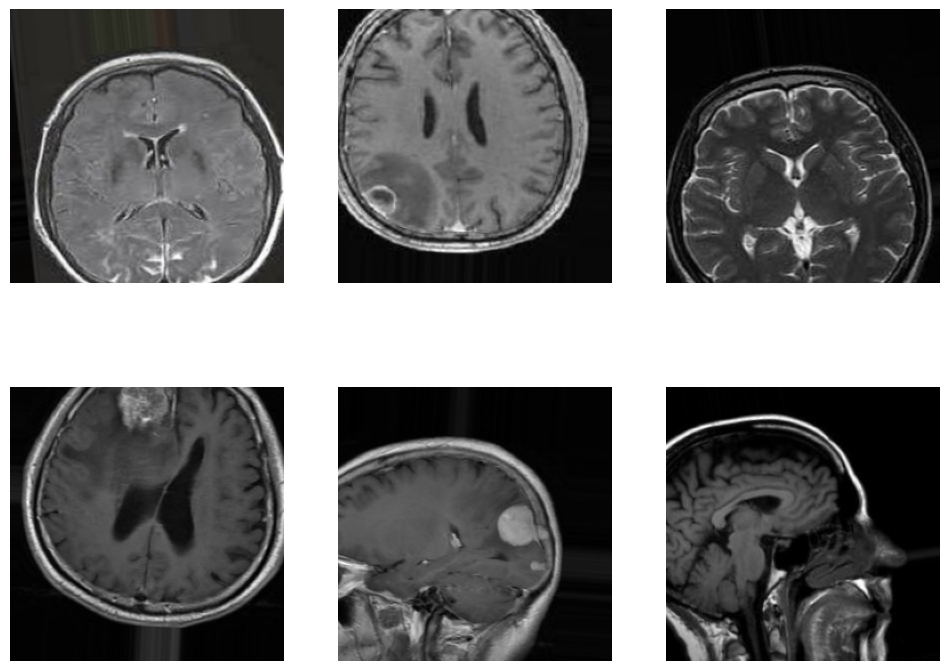

In [37]:
sampleX,sampleY = next(trainData)
plt.figure(figsize=(12,9))
for i in range(6):
  plt.subplot(2,3,i+1)
  sample= array_to_img(sampleX[i])
  plt.axis('off')
  plt.grid(False)
  plt.imshow(sample)
plt.show()

In [38]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Dropout,GlobalMaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [39]:
effenet = EfficientNetB1(weights='imagenet',include_top=False,input_shape=(240,240,3))

model = effenet.output
model = GlobalMaxPooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(4,activation='softmax')(model)
model = Model(inputs=effenet.input,outputs=model)
model.summary()

27018416/27018416 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 240, 240,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 240, 240,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 240, 240,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 240, 240,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 241, 241,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 120, 120,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 120, 120,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 120, 120,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 120, 120,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 120, 120,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 120, 120,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 120, 120,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 120, 120,  │        512 │ block1a_se_excit

 Total params: 6,580,363 (25.10 MB)

 Trainable params: 6,518,308 (24.87 MB)

 Non-trainable params: 62,055 (242.41 KB)

In [40]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

checkPoint=ModelCheckpoint('model.keras',
                monitor = 'val_accuracy',
                save_best_only = True,
                verbose=1,
                mode='auto')
earlyStop=EarlyStopping(monitor='val_accuracy',
              patience=5,
              mode='auto',
              verbose=1)

reduceLR=ReduceLROnPlateau(monitor='val_accuracy',
                  factor=0.3,
                  patience=2,
                  mode='auto',
                  min_delta=0.001,
                  verbose=1)

In [41]:
%%time
history01=model.fit(trainData,
                    epochs=30,
                    validation_data=validData,
                    verbose=1,
                    callbacks = [checkPoint,earlyStop,reduceLR])

Epoch 1/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 929ms/step - accuracy: 0.7372 - loss: 2.0129
Epoch 1: val_accuracy improved from -inf to 0.88869, saving model to model.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 294s 1s/step - accuracy: 0.7380 - loss: 2.0054 - val_accuracy: 0.8887 - val_loss: 0.6076 - learning_rate: 0.0010
Epoch 2/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step - accuracy: 0.9218 - loss: 0.2401
Epoch 2: val_accuracy did not improve from 0.88869
143/143 ━━━━━━━━━━━━━━━━━━━━ 86s 598ms/step - accuracy: 0.9218 - loss: 0.2402 - val_accuracy: 0.8826 - val_loss: 0.3712 - learning_rate: 0.0010
Epoch 3/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step - accuracy: 0.9481 - loss: 0.1569
Epoch 3: val_accuracy improved from 0.88869 to 0.92025, saving model to model.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 144s 614ms/step - accuracy: 0.9480 - loss: 0.1571 - val_accuracy: 0.9202 - val_loss: 0.2136 - learning_rate: 0.0010
Epoch 4/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.9611 - loss: 0.1176
E

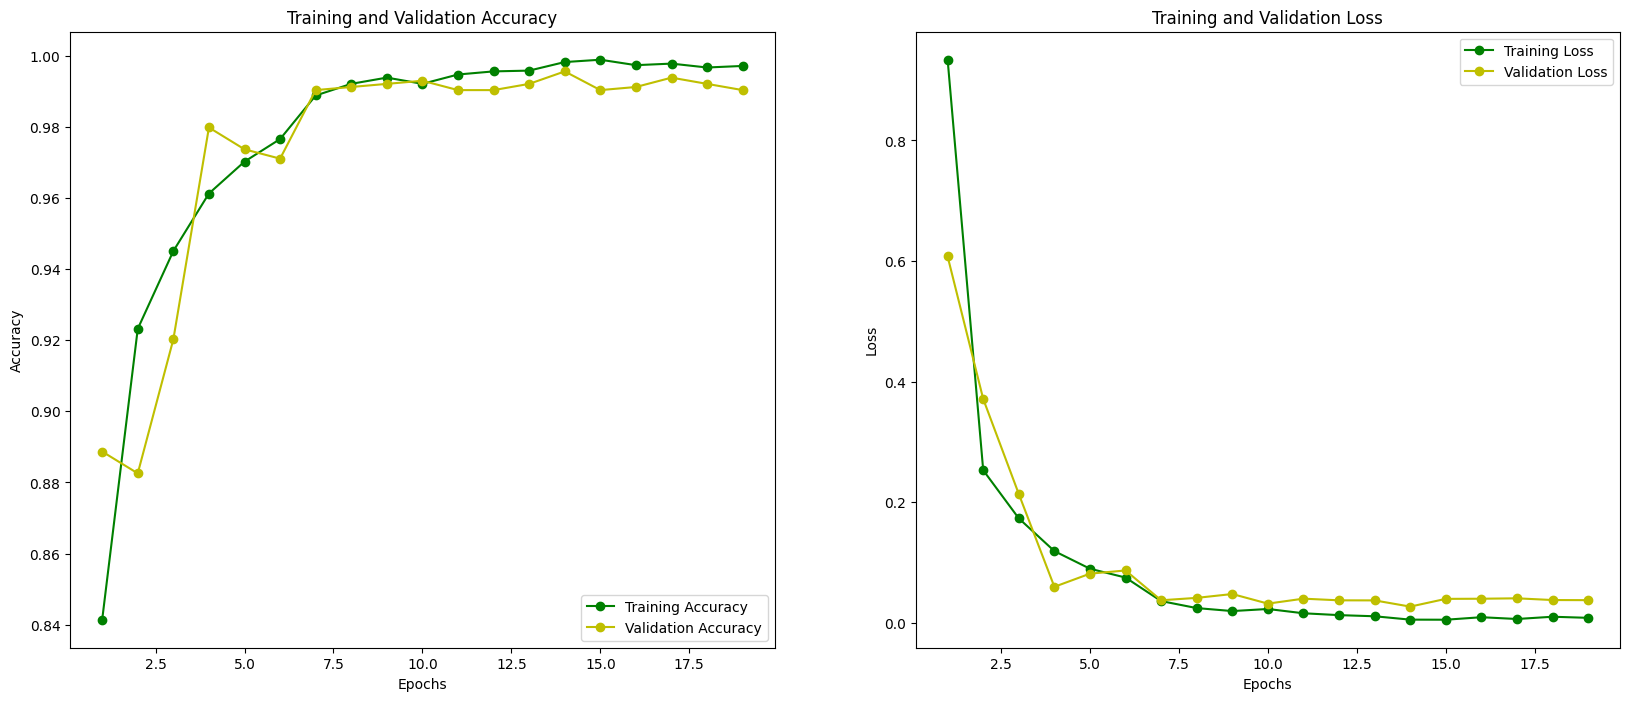

In [45]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(20,8)
trainAcc=history01.history['accuracy']
trainLoss=history01.history['loss']
valAcc=history01.history['val_accuracy']
valLoss=history01.history['val_loss']

epochs = range(1,len(trainAcc)+1)
ax[0].plot(epochs,trainAcc,'g-o',label='Training Accuracy')
ax[0].plot(epochs,valAcc,'y-o',label='Validation Accuracy')
ax[0].set_title('Training and Validation Accuracy')
ax[0].legend(loc='lower right')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

ax[1].plot(epochs,trainLoss,'g-o',label='Training Loss')
ax[1].plot(epochs,valLoss,'y-o',label='Validation Loss')
ax[1].set_title('Training and Validation Loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
plt.show()

In [46]:
model.evaluate(trainData)

143/143 ━━━━━━━━━━━━━━━━━━━━ 69s 485ms/step - accuracy: 0.9999 - loss: 0.0012


[0.001797430100850761, 0.9993436932563782]

In [47]:
model.evaluate(testData)

41/41 ━━━━━━━━━━━━━━━━━━━━ 32s 792ms/step - accuracy: 0.9878 - loss: 0.0324


[0.02336033247411251, 0.9916094541549683]

In [48]:
yTest = testData.classes
yTestHat=np.argmax(model.predict(testData),axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 44s 852ms/step


In [50]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report,confusion_matrix

In [51]:
cm = confusion_matrix(yTest,yTestHat)
cm

array([[294,   6,   0,   0],
       [  0, 304,   1,   1],
       [  0,   0, 405,   0],
       [  1,   1,   0, 298]])

In [52]:
testData.class_indices

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

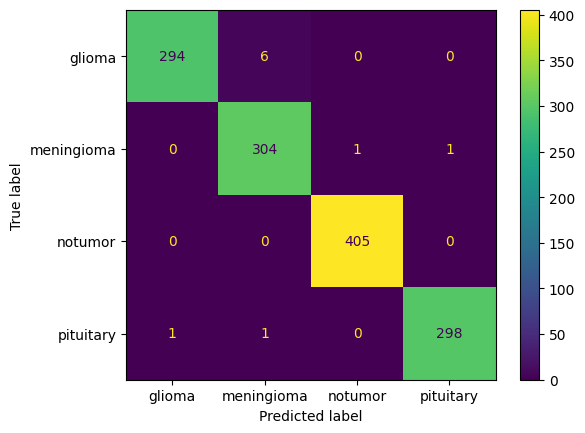

In [56]:
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=testData.class_indices)
cmDisplay.plot()
plt.show()

In [57]:
print(classification_report(yTest,yTestHat))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       300
           1       0.98      0.99      0.99       306
           2       1.00      1.00      1.00       405
           3       1.00      0.99      0.99       300

    accuracy                           0.99      1311
   macro avg       0.99      0.99      0.99      1311
weighted avg       0.99      0.99      0.99      1311



In [58]:
# Prediction on Test Images

In [62]:
from PIL import Image
CLASSDICT = {0:'glioma',1: 'meningioma', 2:'notumor', 3:'pituitary'}
images=[]
prediction=[]
original=[]
for i in os.listdir('/content/Test_Data'):
  for item in os.listdir(os.path.join('/content/Test_Data',i)):
    img_path = os.path.join('/content/Test_Data', i, item)
    img = Image.open(img_path)
    images.append(img)
    # Convert image to array and expand dims
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    preds = model.predict(img_array)
    pred_label = np.argmax(preds)
    prediction.append(CLASSDICT[pred_label])
    original.append(i)


1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━

In [63]:
score = accuracy_score(original,prediction)
score

0.9908466819221968

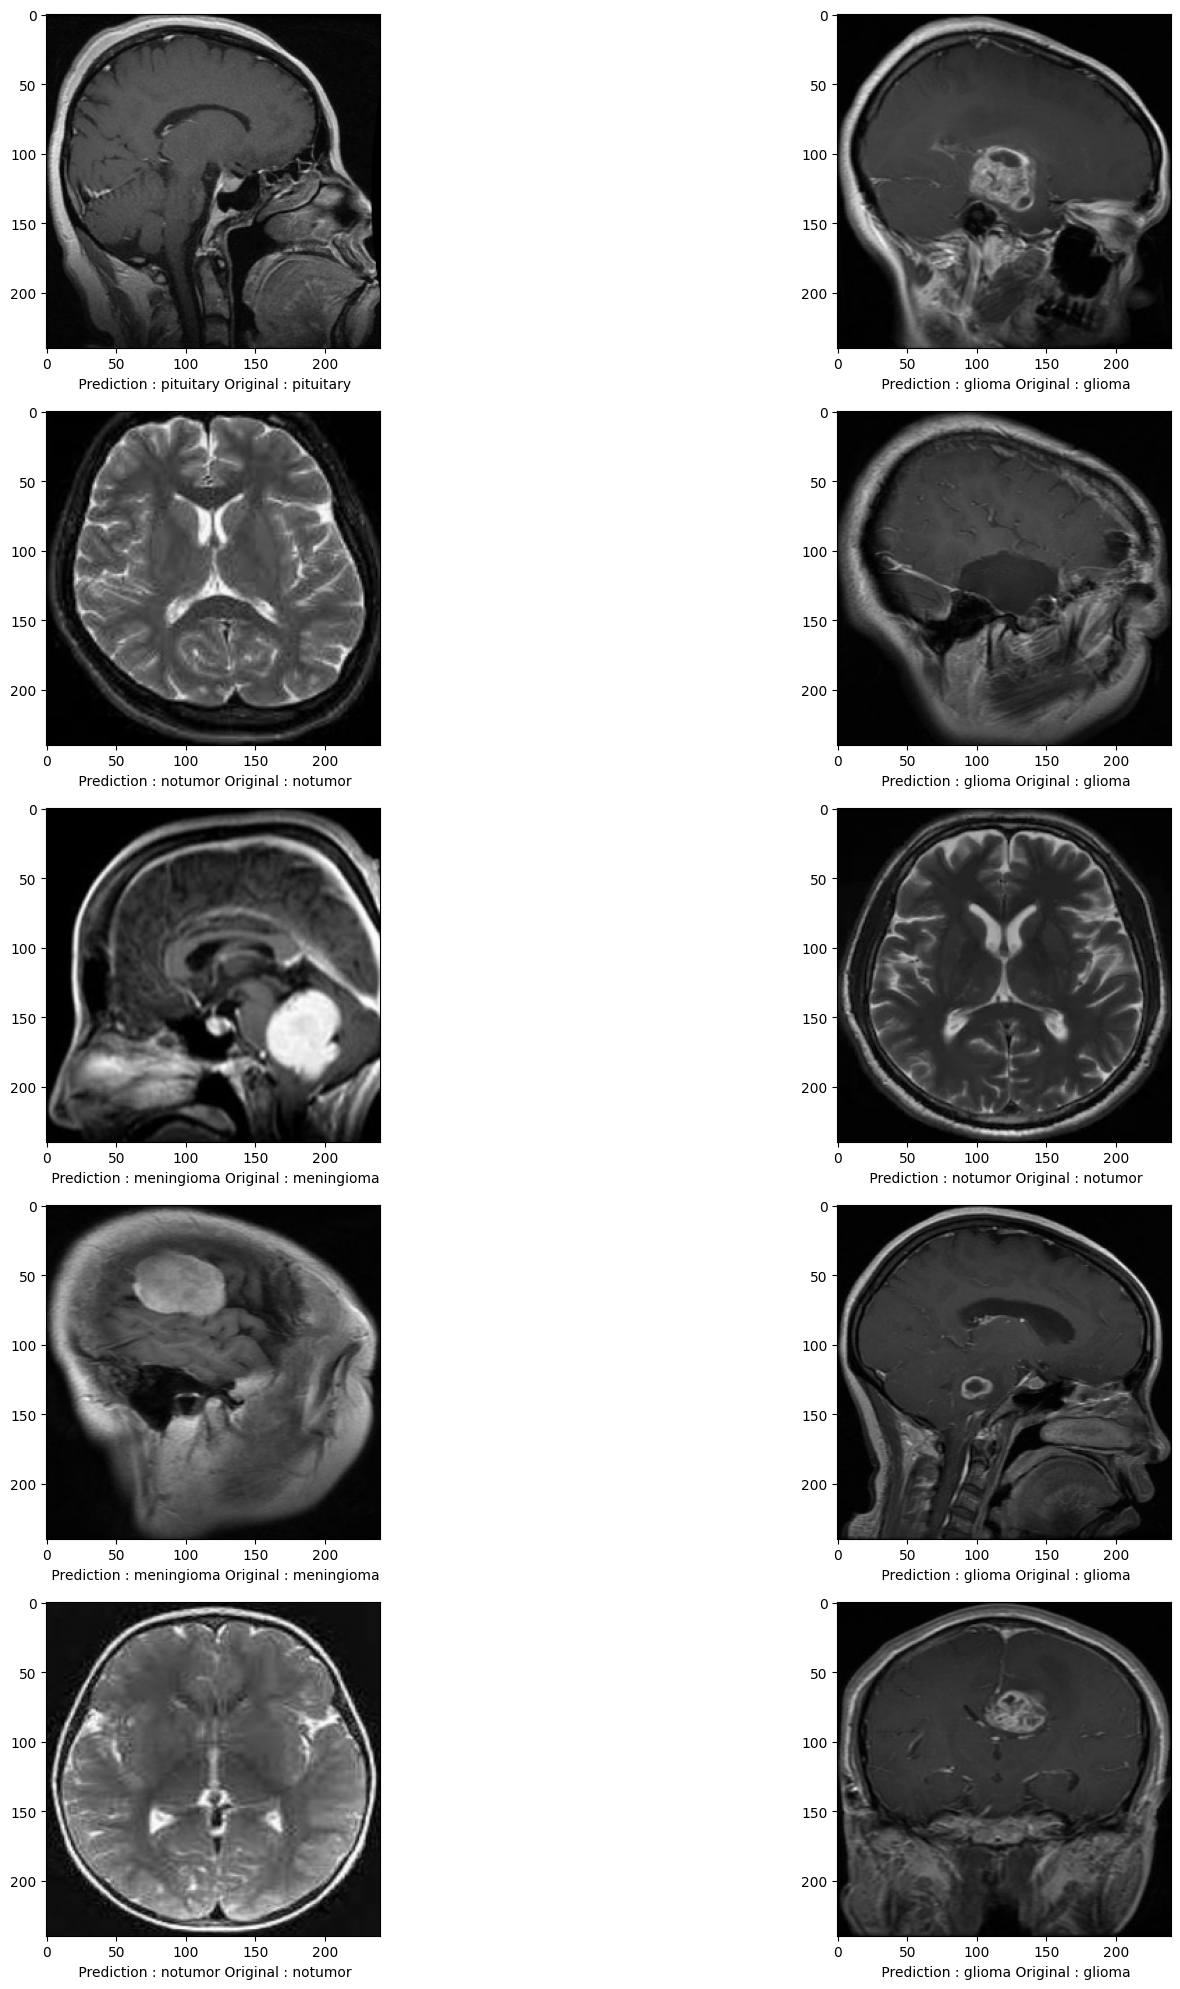

In [67]:
fig = plt.figure(figsize=(20,20))
for i in range(10):
    j=random.randint(0,len(images))
    a=fig.add_subplot(5,2,i+1)
    plt.xlabel(" Prediction : "+prediction[j]+ " Original : "+original[j])
    plt.imshow(images[j])
plt.tight_layout()
plt.show()


In [68]:
import tensorflow as tf
last_conv_layer = next(x for x in model.layers[::-1] if isinstance(x, tf.keras.layers.Conv2D))
last_conv_layer.name

'top_conv'

In [69]:
import cv2
import numpy as np
from PIL import Image
import tensorflow as tf
import tensorflow.keras as K
import matplotlib.pyplot as plt
from skimage.transform import resize
from tensorflow.keras.models import Model

def VizGradCAM(model, image, interpolant=0.5, plot_results=True):
    """VizGradCAM - Displays GradCAM based on Keras / TensorFlow models
    using the gradients from the last convolutional layer. This function
    should work with all Keras Application listed here:
    https://keras.io/api/applications/

    Parameters:
    model (keras.model): Compiled Model with Weights Loaded
    image: Image to Perform Inference On
    plot_results (boolean): True - Function Plots using PLT
                            False - Returns Heatmap Array

    Returns:
    Heatmap Array?
    """
    # Sanity Check
    assert (
        interpolant > 0 and interpolant < 1
    ), "Heatmap Interpolation Must Be Between 0 - 1"

    last_conv_layer = next(
        x for x in model.layers[::-1] if isinstance(x, K.layers.Conv2D)
    )
    target_layer = model.get_layer(last_conv_layer.name)

    original_img = image
    img = np.expand_dims(original_img, axis=0)
    prediction = model.predict(img)

    # Obtain Prediction Index
    prediction_idx = np.argmax(prediction)

    # Compute Gradient of Top Predicted Class
    with tf.GradientTape() as tape:
        gradient_model = Model([model.inputs], [target_layer.output, model.output])
        conv2d_out, prediction = gradient_model(img)
        # Obtain the Prediction Loss
        loss = prediction[:, prediction_idx]

    # Gradient() computes the gradient using operations recorded
    # in context of this tape
    gradients = tape.gradient(loss, conv2d_out)

    # Obtain the Output from Shape [1 x H x W x CHANNEL] -> [H x W x CHANNEL]
    output = conv2d_out[0]

    # Obtain Depthwise Mean
    weights = tf.reduce_mean(gradients[0], axis=(0, 1))

    # Create a 7x7 Map for Aggregation
    activation_map = np.zeros(output.shape[0:2], dtype=np.float32)

    # Multiply Weights with Every Layer
    for idx, weight in enumerate(weights):
        activation_map += weight * output[:, :, idx]

    # Resize to Size of Image
    activation_map = cv2.resize(
        activation_map.numpy(), (original_img.shape[1], original_img.shape[0])
    )

    # Ensure No Negative Numbers
    activation_map = np.maximum(activation_map, 0)

    # Convert Class Activation Map to 0 - 255
    activation_map = (activation_map - activation_map.min()) / (
        activation_map.max() - activation_map.min()
    )
    activation_map = np.uint8(255 * activation_map)

    # Convert to Heatmap
    heatmap = cv2.applyColorMap(activation_map, cv2.COLORMAP_JET)
     # Superimpose Heatmap on Image Data
    original_img = np.uint8(
        (original_img - original_img.min())
        / (original_img.max() - original_img.min())
        * 255
    )

    cvt_heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    # Enlarge Plot
    plt.rcParams["figure.dpi"] = 100

    if plot_results == True:
        plt.imshow(
            np.uint8(original_img * interpolant + cvt_heatmap * (1 - interpolant))
        )
    else:
        return cvt_heatmap


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


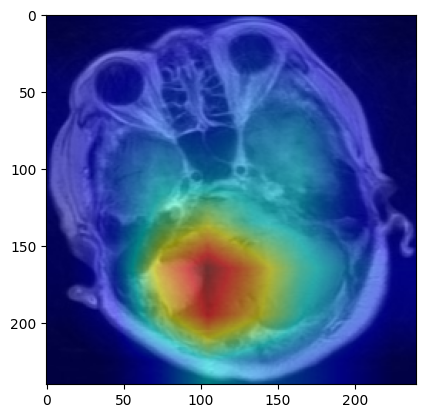

In [70]:
testImage = cv2.imread('/content/Test_Data/meningioma/103.jpeg')
VizGradCAM(model,testImage)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


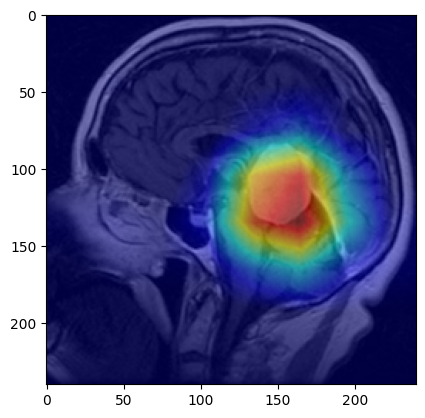

In [71]:
testImage = cv2.imread('/content/Test_Data/meningioma/116.jpeg')
VizGradCAM(model,testImage)

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


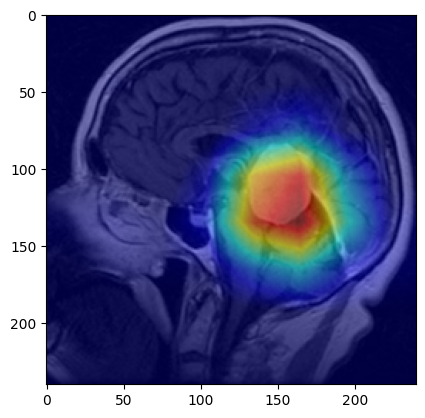

In [72]:
testImage = cv2.imread('/content/Test_Data/meningioma/116.jpeg')
VizGradCAM(model,img_to_array(testImage),plot_results=True)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


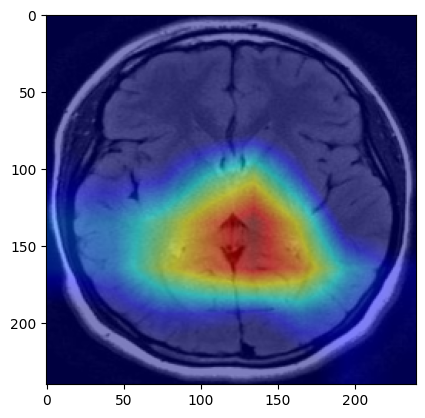

In [73]:
testImage = cv2.imread('/content/Test_Data/notumor/119.jpeg')
VizGradCAM(model,img_to_array(testImage),plot_results=True)